In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
print(type(X))

<class 'numpy.ndarray'>


In [6]:
X_pd = pd.DataFrame(data=X)

In [7]:
X_pd

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
X_pd.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(150, 4)
[[ 8.17940827e-05 -3.66125836e-05  9.62865052e-04  9.99999532e-01]
 [ 1.13612585e-01 -1.10352522e-01  9.87377117e-01 -9.64044499e-04]
 [ 3.85301033e-01  9.20928970e-01  5.85913273e-02 -5.42133224e-05]
 [ 9.15770325e-01 -3.73780888e-01 -1.47148079e-01  5.30940899e-05]]
8.179408269281868e-05
-3.6612583612071757e-05
0.11361258474830344
-0.1103525219478035
0.3853010329783855
0.9209289697994351
0.9157703248535232
-0.37378088787875535


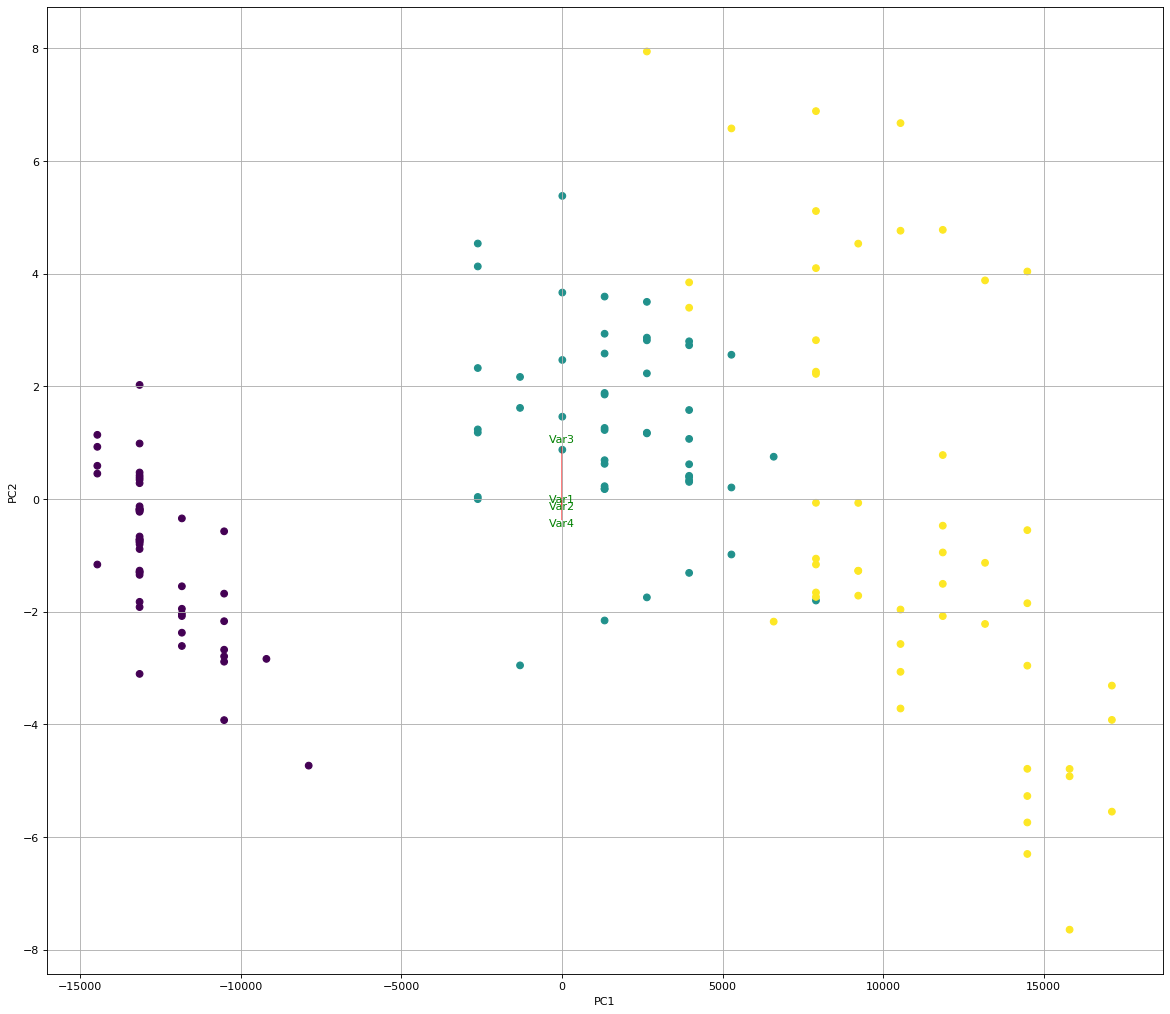

In [27]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)

pca = PCA()
X[:,3] = X[:,3] * 100
X[:,2] = X[:,2] * 10
pca.fit(X,y)
x_new = pca.transform(X)   

print(x_new.shape)
print(pca.components_)

c1 = 0
c2 = 1

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        print(coeff[i,0])
        print(coeff[i,1])
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

            
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,c1:c2+1], pca.components_) 
plt.show()

(150, 4)
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
0.5210659146701196
-0.2693474425059431
0.37741761556456693
0.9232956595407149
-0.7195663527008169
0.24438177951439913
-0.26128627995245307
0.12350961958551902


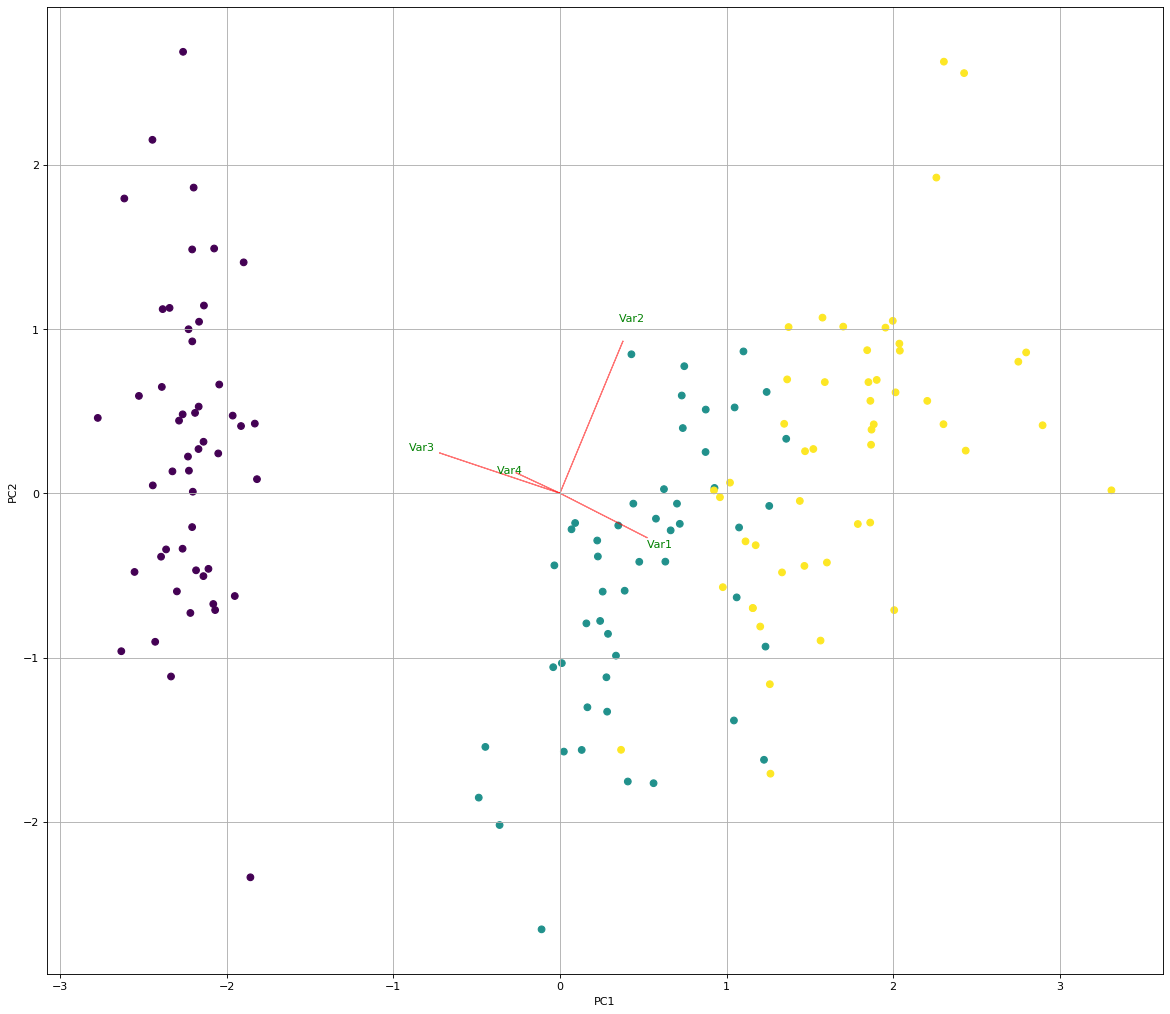

In [28]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')



pca = PCA()
X[:,3] = X[:,3] * 100
X[:,2] = X[:,2] * 10

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca.fit(X,y)
x_new = pca.transform(X)   

print(x_new.shape)
print(pca.components_)

c1 = 0
c2 = 1

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        print(coeff[i,0])
        print(coeff[i,1])
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

            
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,c1:c2+1], pca.components_) 
plt.show()